In [8]:
# Import necessary modules

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix 
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# We use our cleaned up dataframe
df = pd.read_csv("clean_coachella.csv", encoding = 'latin', index_col = 0)
df

,coachella_sentiment,text,polarity,clean_text
0,positive,#Coachella2015 tickets selling out in less tha...,2,Coachella tickets selling out in less than min...
1,positive,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _Ã...,2,WAIT THIS IS ABSOLUTE FIRE Coachella
2,positive,#Coachella2015 #VIP passes secured! See you th...,2,Coachella VIP passes secured! See you there bi...
3,positive,PhillyÂÃÂªs @warondrugsjams will play #Coach...,2,Phillys will play Coachella amp GovBall ! Watc...
4,positive,If briana and her mom out to #Coachella2015 i...,2,If briana and her mom out to Coachella im out ...
...,...,...,...,...
3759,negative,.@stromae at #coachella2015 is literally the o...,0,. at coachella is literally the only reason i ...
3760,negative,Anyone else not completely sold? #Coachella201...,0,Anyone else not completely sold? Coachella
3761,negative,Recycled as fuck #Coachella2015 #Coachella htt...,0,Recycled as fuck Coachella Coachella
3762,negative,Line up out already or is it fake like every o...,0,Line up out already or is it fake like every o...


In [10]:
# We import transformer's finetuned sentiment analysis pipeline
nlp = pipeline("sentiment-analysis")

Couldn't reach server at 'https://s3.amazonaws.com/models.huggingface.co/bert/distilbert-base-uncased-finetuned-sst-2-english-modelcard.json' to download model card file.
Creating an empty model card.


In [11]:
# We run each tweet through the pipeline and extract the label and score which we classify into one of our three sentiment classes.
# We use 0.95 as a cutoff score because it is 
abspipeline_label = []
pipeline_score = []

for tweet in df.clean_text:
    sentiment = nlp(tweet)
    pipeline_score.append(sentiment[0]['score'])
    if sentiment[0]['score'] >= 0.95:
        pipeline_label.append(sentiment[0]['label'].lower())
    else:
        pipeline_label.append('neutral')
    
df['pipeline_label'] = pipeline_label
df['pipeline_score'] = pipeline_score
df.sample(5)

,coachella_sentiment,text,polarity,clean_text,pipeline_label,pipeline_score
45,positive,Someone sell me one car camping pass for Coach...,2,Someone sell me one car camping pass for Coach...,negative,0.965715
1093,positive,Once I saw @FLOSSTRADAMUS and @keysnkrates I w...,2,Once I saw and I was sold Coachella,negative,0.986309
503,positive,dream coachella ÂÃ·Â¨ÂÃ·Â¨ÂÃ·Â¨ #Coachella ...,2,dream coachella Coachella Coachella,positive,0.997918
2982,neutral,(Cums) RT @Forever21: The lineup is here! #Coa...,1,Cums The lineup is here! Coachella,neutral,0.610249
2012,positive,OMG! @coachella looks NUTS for next year!! ahh...,2,OMG! looks NUTS for next year!! ahhhhh! Califo...,neutral,0.667720


In [12]:
classification_report(df.coachella_sentiment, df.pipeline_label,target_names=['negative','neutral','positive'],output_dict= True)

{'negative': {'precision': 0.30125195618153366,
  'recall': 0.6962025316455697,
  'f1-score': 0.42053522665210274,
  'support': 553},
 'neutral': {'precision': 0.3160919540229885,
  'recall': 0.23706896551724138,
  'f1-score': 0.270935960591133,
  'support': 928},
 'positive': {'precision': 0.7307262569832402,
  'recall': 0.5729303547963206,
  'f1-score': 0.6422784188558801,
  'support': 2283},
 'accuracy': 0.5082359192348566,
 'macro avg': {'precision': 0.4493567223959208,
  'recall': 0.5020672839863772,
  'f1-score': 0.44458320203303864,
  'support': 3764},
 'weighted avg': {'precision': 0.5654021545681346,
  'recall': 0.5082359192348566,
  'f1-score': 0.5181472322038148,
  'support': 3764}}

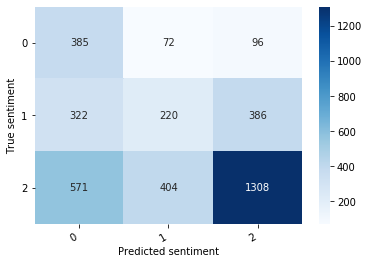

In [13]:
# We observe a significant number of tweets that are predicted by negative but actually positive.
# This can be attributed to lack of finetuning on specific words or phrases that might appear in our dataset that indicate positive sentiment.
cm = confusion_matrix(df.coachella_sentiment, df.pipeline_label)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True sentiment')
plt.xlabel('Predicted sentiment')
plt.show()